In [3]:
%display latex 

# Metodos Matematicos para la Fisica - Laboratorio 2 

# Problema 1
Si se supone que el arrastre es proporcional al cuadrado de la velocidad, se puede modelar la velocidad de un objeto que cae, como un paracaidista, por medio de la ecuacion diferencial siguiente:
$$\frac{dv}{dt} = g-\frac{c_d}{m}v^2$$
donde $v$ es a velocidad (m/s) $t=$ tiempo(s), $g$ esla aceleración de la gravedad $g=(9.81\frac{m}{s^2})$, $c_d=$coeficiente de arraste ($\frac{kg}{m})$ y $m=$masa(kg). Resuelva para la velocidad y distancia que recorre un objeto de $90kg$ con coeficifiente de arrastre de $0.225\frac{kg}{m}$. Si la altura inicial es de $1 km$, determine en qué momento choca con el suelo.

## 1. Obtenenga la solucion de manera analítica.
### Cálculo de la función velocidad

Hacemos $b=\frac{c_d}{m}$, entonces:
$$\frac{dv}{dt}=g-bv^2$$
$$\frac{dv}{(\sqrt{g}-\sqrt{b}v)(\sqrt{g}+\sqrt{b}v)}=dt$$
$$-\frac{1}{2\sqrt{g}}( \frac{1}{\sqrt{b}v-\sqrt{g}}-\frac{1}{\sqrt{b}v+\sqrt{g}} )dv=dt$$
$$-\frac{1}{2\sqrt{gb}}\ln{|\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}|}= t + C$$
$$\ln{|\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}|}=-2\sqrt{bg}t+\ln{C_1}$$
$$\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}=C_1e^{-2\sqrt{bg}t}$$

Como en $t=0$, $v=0$, por lo tanto:  $$C_1=-1$$
Entonces:
$$\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}=-e^{-2\sqrt{bg}t}$$
Despegando $v$:
$$v=\frac{\sqrt{g}}{\sqrt{b}} \frac{1-e^{-2\sqrt{bg}t}}{1+e^{-2\sqrt{bg}t}}$$

Reemplazando $b=\frac{c_d}{m}$
$$v=\sqrt{\frac{g}{b}} \frac{1-e^{-2\sqrt{bg}t}}{1+e^{-2\sqrt{bg}t}}$$

### Cálculo de la funcion altura

Hacemos $a=\sqrt{\frac{g}{b}}$ y $k=2\sqrt{bg}$ ,entonces
$$v=a\frac{1-e^{-kt}}{1+e^{-kt}}$$
Como $dy=-vdt$, entonces:
$$dy=a\frac{e^{-kt}-1}{e^{-kt}+1}dt$$


Integrando ambas partes:
$$y=a\int\frac{e^{-kt}-1}{e^{-kt}+1}dt$$
$$y=a\int\frac{-(e^{-kt}+1)+2e^{kt}}{e^{-kt}+1}dt$$
$$y=a\int-dt-\frac{2}{k}\frac{d(e^{-kt}+1)}{e^{-kt}+1}$$
$$y=-at-\frac{2a}{k}\ln{(e^{-kt}+1)}+C$$

Como en $t=0$, $y=1000$, por lo tanto:
$$1=-\frac{2a}{k}\ln{(2)}+C$$
$$C=1000+\frac{2a}{k}\ln{(2)}$$
Por lo que :
$$y=-at-\frac{2a}{k}\ln{(e^{-kt}+1)}+1000+\frac{2a}{k}\ln{(2)}$$

### Definimos las funciones correspondientes

In [1]:
#Definimos las contantes
c_d = 0.225
m = 90
g = 9.81

b = c_d/m
a = sqrt(g/b)
k = 2*sqrt(g*b)

#Definimos la variable t
t = var("t")

#Definimos las funciones
v = function("v")(t)
y = function("y")(t)

v = a*(1-e^(-k*t))/(1+e^(-k*t))
y = -a*t-2*a/k*ln(e^(-k*t)+1)+1000+2*a/k*ln(2)


In [2]:
#Mostramos las funciones 
v.simplify()

(-62.6418390534633*e^(-0.3132091952673165*t) + 62.6418390534633)/(e^(-0.3132091952673165*t) + 1)

In [3]:
y.simplify()

-62.6418390534633*t + 400.0*log(2) - 400.0*log(e^(-0.3132091952673165*t) + 1) + 1000

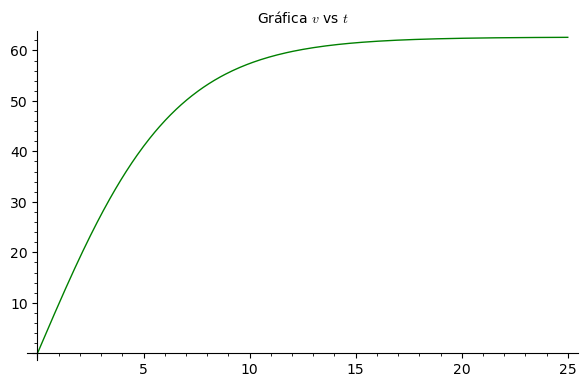

In [4]:
plot(v, (t,0,25), title='Gráfica $v$ vs $t$', color="green")

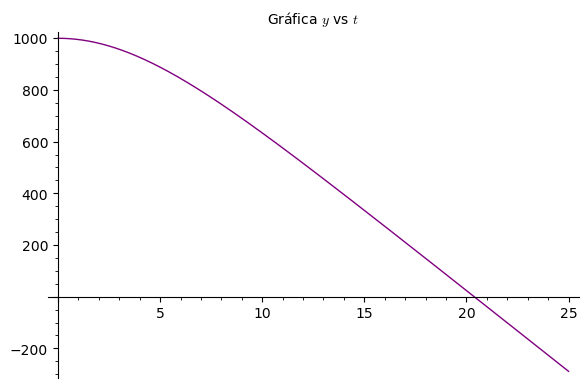

In [5]:
plot(y, (t,0,25), title='Gráfica $y$ vs $t$', color="purple")

### Obtenemos el tiempo 

Resolvemos la ecuacion $y=0$ con la función **find_root()**

In [6]:
assume(t>0)
#Calculamos el timpo de choque
t_sol=find_root(y==0,0,25)
#Mostramos el valor numérico aproximado
show("Tiempo de choque:\n",N(t_sol))


'Tiempo de choque:\n' 20.3790850957600

## 2.  Hallar hasta la sexta aproximacion con el metodo de Aproximaciones Susesivas

## Velocidad
Obtenemos las aproximaciones sucesivas para la velocidad

In [7]:
#Definimos las contantes
c_d = 0.225
m = 90
g = 9.81

#Definimos las variables
x = var('x')
t = var("t")

#Definimos la funcione derivada
f(x,y) = g-c_d/m*y^2

#Obtenemos las aproximaciones sucesivas
y_0 = 0 #Funcion inicial
y_1 = y_0 + integrate(f(t,y_0),t)(x)    - integrate(f(t,y_0),t)(0)
y_2 = y_0 + integrate(f(t,y_1(t)),t)(x) - integrate(f(t,y_1(t)),t)(0)
y_3 = y_0 + integrate(f(t,y_2(t)),t)(x) - integrate(f(t,y_2(t)),t)(0)
y_4 = y_0 + integrate(f(t,y_3(t)),t)(x) - integrate(f(t,y_3(t)),t)(0)
y_5 = y_0 + integrate(f(t,y_4(t)),t)(x) - integrate(f(t,y_4(t)),t)(0)
y_6 = y_0 + integrate(f(t,y_5(t)),t)(x) - integrate(f(t,y_5(t)),t)(0)

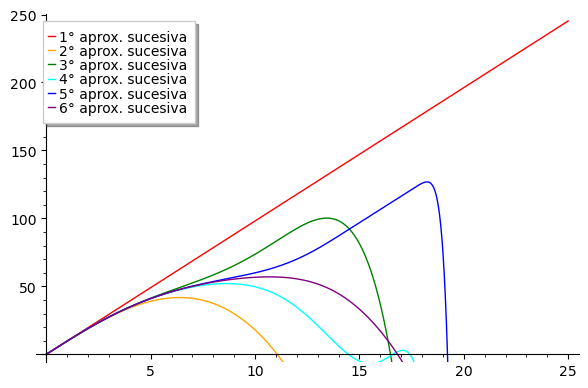

In [8]:
G1 = plot(y_1,(0,25),ymin=-1,color="red",legend_label="1° aprox. sucesiva")
G2 = plot(y_2,(0,25),ymin=-1,color="orange",legend_label="2° aprox. sucesiva")
G3 = plot(y_3,(0,25),ymin=-1,color="green",legend_label="3° aprox. sucesiva")
G4 = plot(y_4,(0,25),ymin=-1,color="cyan",legend_label="4° aprox. sucesiva")
G5 = plot(y_5,(0,25),ymin=-1,color="blue",legend_label="5° aprox. sucesiva")
G6 = plot(y_6,(0,25),ymin=-1,color="purple",legend_label="6° aprox. sucesiva")

G1+G2+G3+G4+G5+G6


Tomameros la sexta aproximación sucesiva como la función velocidad a utilizar para la aroximación de la función altura

## Posición
Obtenemos las aproximaciones sucesivas para la altura

In [9]:
#Definimos la función derivada de la altura
f(x,y) = -y_6(x)
#Obtenamos las aproximaciones sucesivas
y_0 = 1000
y_1 = y_0 + integrate(f(t,y_0),t)(x)    - integrate(f(t,y_0),t)(0)
y_2 = y_0 + integrate(f(t,y_1(t)),t)(x) - integrate(f(t,y_1(t)),t)(0)
y_3 = y_0 + integrate(f(t,y_2(t)),t)(x) - integrate(f(t,y_2(t)),t)(0)
y_4 = y_0 + integrate(f(t,y_3(t)),t)(x) - integrate(f(t,y_3(t)),t)(0)
y_5 = y_0 + integrate(f(t,y_4(t)),t)(x) - integrate(f(t,y_4(t)),t)(0)
y_6 = y_0 + integrate(f(t,y_5(t)),t)(x) - integrate(f(t,y_5(t)),t)(0)

'Sexta aproximación sucesiva:\n' (2.4110996612680486e-75)*x^64 - (8.687324030171233e-72)*x^62 + (1.4999959246451384e-68)*x^60 - (1.6683110200471815e-65)*x^58 + (1.3561249635807867e-62)*x^56 - (8.658084126425383e-60)*x^54 + (4.546783204773178e-57)*x^52 - (2.0270016108592502e-54)*x^50 + (7.848987839156447e-52)*x^48 - (2.686851086747511e-49)*x^46 + (8.247019739533443e-47)*x^44 - (2.296412036542284e-44)*x^42 + (5.858233092150547e-42)*x^40 - (1.380404305331742e-39)*x^38 + (3.0246967863883913e-37)*x^36 - (6.197404649006356e-35)*x^34 + (1.1931260932463029e-32)*x^32 - (2.168100624494984e-30)*x^30 + (3.7359977467946044e-28)*x^28 - (6.132217470683125e-26)*x^26 + (9.62355447698766e-24)*x^24 - (1.4481353921790353e-21)*x^22 + (2.0942329919385462e-19)*x^20 - (2.918304656331375e-17)*x^18 + (3.92840623658046e-15)*x^16 - (5.115993960578849e-13)*x^14 + (6.428729195933449e-11)*x^12 - (7.761464901068097e-09)*x^10 + (9.762126614246652e-07)*x^8 - 0.00013112168625*x^6 + 0.0200491875*x^4 - 4.905*x^2 + 1000

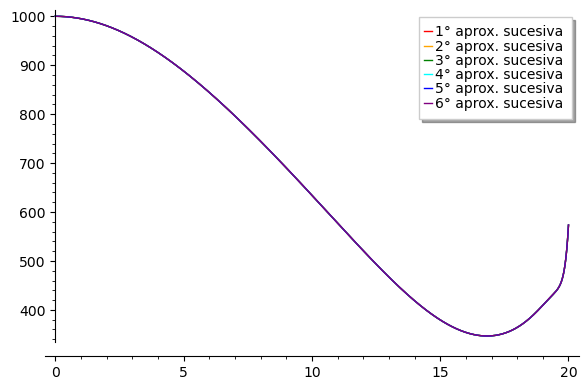

In [21]:
G1 = plot(y_1,(0,20),color="red",legend_label="1° aprox. sucesiva")
G2 = plot(y_2,(0,20),color="orange",legend_label="2° aprox. sucesiva")
G3 = plot(y_3,(0,20),color="green",legend_label="3° aprox. sucesiva")
G4 = plot(y_4,(0,20),color="cyan",legend_label="4° aprox. sucesiva")
G5 = plot(y_5,(0,20),color="blue",legend_label="5° aprox. sucesiva")
G6 = plot(y_6,(0,20),color="purple",legend_label="6° aprox. sucesiva")
G1+G2+G3+G4+G5+G6

#### Nota : Reiniciar el kernel para que poder visualizar las graficas de matplotlib

## 3. Obtenga la solucion si el paso es de 0,0001 con el Método de Euler

## Velocidad

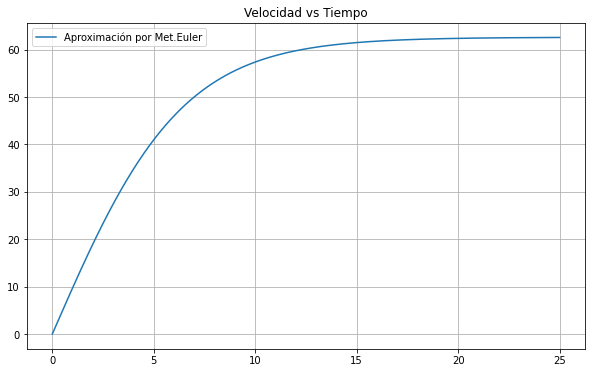

In [22]:
#Defninimos las contante
c_d = 0.225
m = 90
g = 9.81

b = c_d/m
a = sqrt(g/b)
k = 2*sqrt(g*b)

#Importamos las librerias necesarias
import numpy as np #Para usar vectores
import matplotlib.pyplot as plt #Para graficar
#efinimos las función derivada
def f(x,y):
    return g-c_d/m*y**2


h = 0.001  #Definimos la longitud de paso  
a = 0       #Punto de inicio
b = 25      #Punto final
n = (b-a)/h #Numero de particiones

#Definimos los vectores donde se guardadan el tiempo y la vecolidad
x = np.arange(a,b+h, h)
y = np.ones(int(n)+1)

#Vecolidad ininial 
y[0] = 0 

for i in range(0,int(n)):
    y[i+1]= y[i]+f(x[i],y[i])*h


plt.figure(figsize=(10,6))
plt.plot(x,y,label="Aproximación por Met.Euler")
plt.title("Velocidad vs Tiempo")
plt.legend()
plt.grid()
plt.show()


Sin embargo, hasta el momento tenemos un conjunto de "puntos". Lo que necesitamos es una función de la velocidad aproximada. Obtendremos esta gráficas a traves de una función de interpolación.

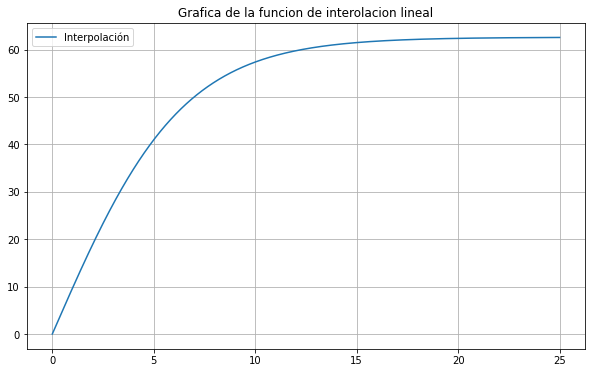

In [23]:
#Importamos la libreria necesaria
from scipy.interpolate import interp1d
#Definimos la funcion de interpolacion lineal
g = interp1d(x,y, kind="linear")
#Graficamos
plt.figure(figsize=(10,6))
plt.grid()
plt.title("Grafica de la funcion de interolacion lineal")
plt.plot(x,g(x),label="Interpolación")
plt.legend()
plt.show()

## Posicion

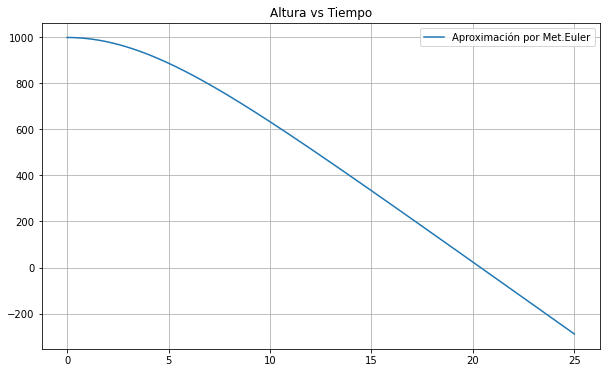

In [24]:
h = 0.001  #Definimos la longitud de paso  
a = 0       #Punto de inicio
b = 25     #Punto final
n = (b-a)/h #Numero de particiones

#Definimos los vectores donde se guardadan el tiempo y posicion(altura)
x = np.arange(a,b+h, h)
y = np.ones(int(n)+1)

#Altura inicial
y[0] = 1000 

for i in range(0,int(n)):
    y[i+1]= y[i]-g(x[i])*h
plt.figure(figsize=(10,6))
plt.plot(x,y,label="Aproximación por Met.Euler")
plt.legend()
plt.title("Altura vs Tiempo")
plt.grid()
plt.show()

In [25]:
for i in range(len(y)):
    if y[i]*y[i+1] <= 0:
        show("Tiempo de choque:\n",x[i],"segundos")
        break


'Tiempo de choque:\n' 20.379 'segundos'

## 4. Compare sus tres resultados y el error que se comete.

Los tres resultados son:

Tiempo hallado de forma analítica: 0.451711799332117

Tiempo hallado a través de método de euler: 0.45170000000000005 .

Además el método de aproximaciones sucesiones no nos pertime hallar una respuesta al problema planteado.



In [26]:
#Calculamos los errores
error = abs(20.379-20.3790850957600)/20.3790850957600*100
show("Error del metodo de Euler: \n", error,"%")

'Error del metodo de Euler: \n' 0.000417564182099033 '%'

# Problema 2
En la investigacion de un homicidio o de una muerte accidental, con frecuencia es importante estimar el tiempo que ha transcurrido desde la muerte. De observaciones experimentales, se sabe que la temperatura superficial de un objeto cambia con una tasa proporcional a la diferencia entre la temperatura del objeto y la del ambiente circundante, o temperatura ambiente. Esto se conoce como ley de Newton del enfriamiento. As ́ı, si $T(t)$ es la temperatura del objeto al tiempo $t$, y $T_a$ es la temperatura ambiente constante:


$$\frac{dT}{dt}=-K(T-T_a)$$

donde $K > 0$ es una constante de proporcionalidad. Suponga que en el momento $t = 0$ se descubre un cuerpo y se mide
su temperatura, $T_0$. Se supone que en el momento de la muerte, la temperatura del cuerpo, $T_d$, era el valor normal de
$37°C$. Suponga que la temperatura del cuerpo al ser descubierto era de $29.5°C$ , y que dos horas despues era de $23.5°C$

La temperatura ambiente es de $20°C$.

## 1. Determine K y el tiempo de la muerte.


De:
$$\frac{dT}{dt}=-K(T-T_a)$$
$$\frac{dT}{T-T_a}=-Kdt$$
$$\ln|T-T_a|=-Kt+\ln(C)$$
$$T=Ce^{-Kt}+T_a$$
Como $T_a=20$:
$$T=Ce^{-Kt}+20$$


Por dato en $t=0$ el cuerpo se descubre muerto con temperatura:
$$T_0=29.5=C+20\to C=9.5$$

En $t=2$: la temperatura del  cuerpo es:
$$T(t=2)=23.5=9.5e^{-K\cdot 2}+20$$

Despejamos $K=0.499264415$

Sea $T_d\equiv$ Temperatura del cuerpo al morir en $t=t_m$

$$T_d=37=9.5e^{-0.499264415\cdot t_m}+20$$

Despejando , $t_m=-1.1655578246$, es decir que el cuerpo lleva $1.1655578246$ horas muerto



## 2. Resuelva con el metodo de Euler. Dar un paso adecuado (h) y usar un programa.
Supongamos que en $t=0$ el cuerpo esta muerto y con $T=37°$  

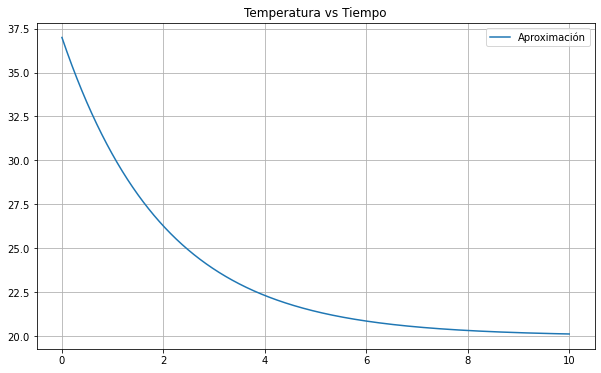

In [27]:
import numpy as np
import matplotlib.pyplot as plt

K = 0.499264415
def f(T,t):
    return -K*(T-20)

h = 0.0001
a = 0
b = 10
n = (b-a)/h


t = np.arange(a,b+h, h)
T = np.ones(int(n)+1)


T[0] = 37 

for i in range(0,int(n)):
    T[i+1]= T[i]+f(T[i],t[i])*h
plt.figure(figsize=(10,6))
plt.plot(t,T,label="Aproximación")
plt.title("Temperatura vs Tiempo")
plt.legend()
plt.grid()
plt.show()

In [28]:
for i in range(len(t)):
    if((T[i]-29.5)*(T[i+1]-29.5)<=0):
        show("El cuerpo lleva: ",t[i],"horas muerto")
        break

'El cuerpo lleva: ' 1.1655 'horas muerto'